<a href="https://colab.research.google.com/github/hafildabelafadhilah/MachineLearning/blob/main/Supervised_Learning_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from pandas._libs.algos import diff_2d

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc  
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import r2_score

In [ ]:
df=pd.read_csv("train (3).csv")
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
#cek informasi setiap variabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
num = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge','number_customer_service_calls']
cat = ['state','area_code','international_plan', 'voice_mail_plan','churn']

In [ ]:
#melihat statistik deskripsi dari variabel numerik
df[num].describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
#melihat statistik deskripsi dari variabel kategorik
df[cat].describe()

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


In [ ]:
#melihat karakteristik dari variabel kategorik
for col in cat:
  print(f'value count untuk kolom {col}:')
  print(df[col].value_counts())
  print()

value count untuk kolom state:
WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
WY     95
OH     95
WI     94
MA     89
ME     89
CT     88
RI     87
MI     87
KS     87
MD     86
VT     86
KY     85
NV     83
IN     83
MS     82
WA     80
NC     80
MO     80
DE     80
CO     80
MT     80
IL     79
TN     79
NM     78
OK     78
NH     78
HI     77
AZ     77
FL     76
SD     75
NE     73
DC     72
SC     72
AR     71
LA     69
PA     67
ND     67
GA     64
IA     62
AK     61
CA     39
Name: state, dtype: int64

value count untuk kolom area_code:
area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

value count untuk kolom international_plan:
no     3854
yes     396
Name: international_plan, dtype: int64

value count untuk kolom voice_mail_plan:
no     3138
yes    1112
Name: voice_mail_plan, dtype: int64

value count untuk kolom churn:
no     3652
yes     598
Name: churn, dtype: int64



In [ ]:
#mengecek apakah ada missing value
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

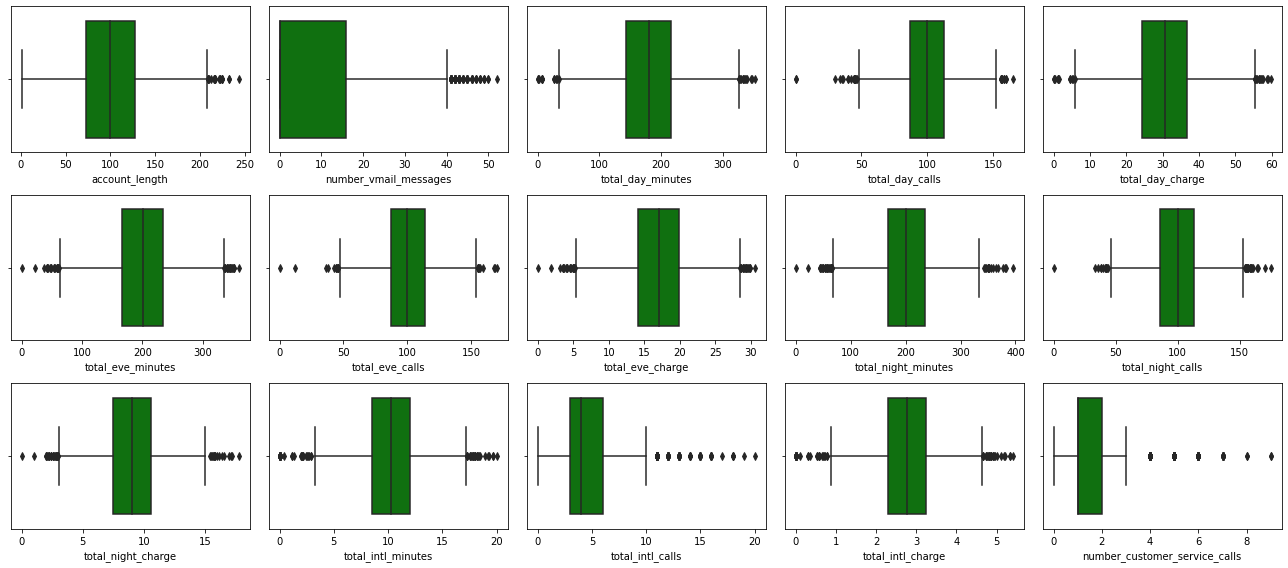

In [ ]:
#cek sebaran data
plt.figure(figsize=(18,8))
for i in range (0, len(num)):
  plt.subplot(3, len(num)/3, i+1)
  sns.boxplot(df[num[i]], color='green', orient='v')
  plt.tight_layout()

In [ ]:
#cek duplikasi data
df.duplicated().sum()

0

In [ ]:
#Handling outlier
print(f'jumlah baris sebelum di filter: {len(df)}')

filter_entries=np.array([True]*len(df))
for col in num:
  zscore = abs(stats.zscore(df[col]))
  filter_entries= (zscore < 3) & filter_entries

df1=df[filter_entries]
print(f'jumlah baris sesudah di filter: {len(df1)}')

jumlah baris sebelum di filter: 4250
jumlah baris sesudah di filter: 4031


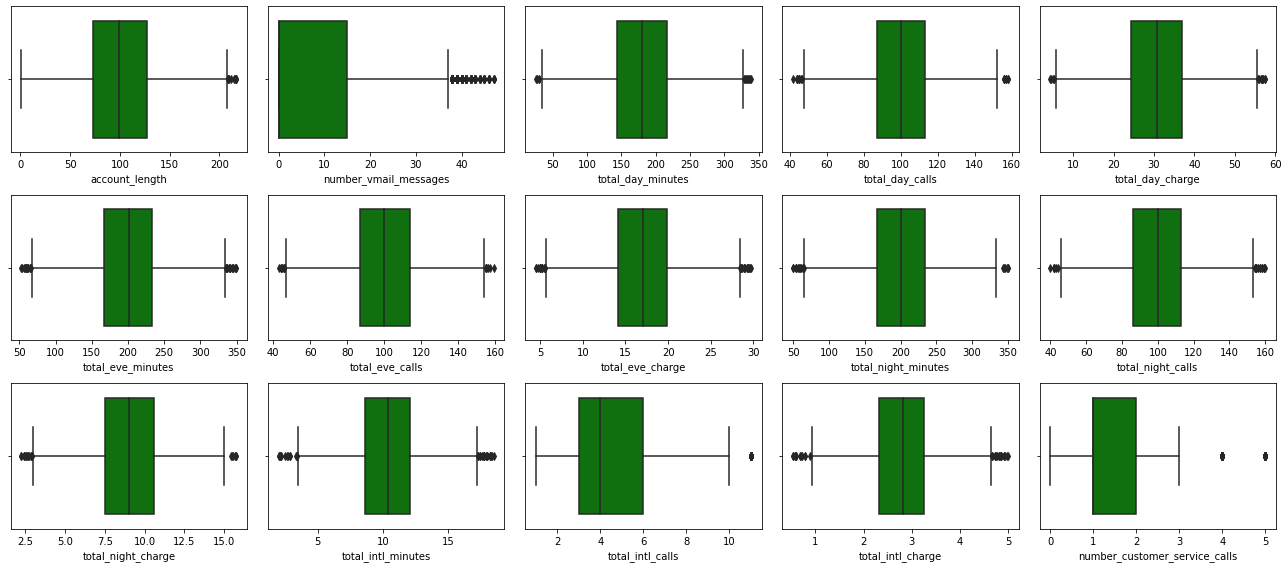

In [ ]:
#cek sebaran data setelah handling outlier
plt.figure(figsize=(18,8))
for i in range (0,len(num)):
  plt.subplot(3, len(num)/3, i+1)
  sns.boxplot(df1[num[i]], color='green', orient='v')
  plt.tight_layout()


In [ ]:
for col in num:
  df1[col]=StandardScaler().fit_transform(df1[col].values.reshape(len(df1),1))

In [ ]:
df1.describe() #for

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4.031000e+03,4.031000e+03,4.031000e+03,4.031000e+03,4.031000e+03,4.031000e+03,4.031000e+03,4.031000e+03,4.031000e+03,4.031000e+03,4.031000e+03,4.031000e+03,4.031000e+03,4.031000e+03,4.031000e+03
mean,1.075245e-16,2.644044e-17,6.147402e-17,-1.551172e-16,1.564393e-17,4.098268e-16,-2.599977e-17,-1.032058e-15,-7.932132e-18,2.185743e-16,-6.863497e-16,1.745069e-16,1.789136e-16,-2.035914e-16,4.406740e-18
std,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00
min,-2.516117e+00,-5.644539e-01,-2.895257e+00,-2.960184e+00,-2.895656e+00,-2.975988e+00,-2.908523e+00,-2.975221e+00,-3.031076e+00,-3.019298e+00,-3.033128e+00,-3.164734e+00,-1.533102e+00,-3.165573e+00,-1.247589e+00
25%,-6.840607e-01,-5.644539e-01,-6.932094e-01,-6.608046e-01,-6.934923e-01,-6.807526e-01,-6.707492e-01,-6.808703e-01,-6.721336e-01,-6.964644e-01,-6.719662e-01,-6.533103e-01,-6.076159e-01,-6.568744e-01,-4.216682e-01
50%,-2.248472e-02,-5.644539e-01,-2.847887e-03,3.460573e-03,-2.358594e-03,8.322442e-03,-9.588800e-03,8.740525e-03,-7.422541e-04,1.048511e-02,9.114149e-05,3.162336e-02,-1.448727e-01,3.372236e-02,-4.216682e-01
75%,6.899817e-01,5.679936e-01,6.772237e-01,6.677258e-01,6.772196e-01,6.721751e-01,7.024301e-01,6.710517e-01,6.908110e-01,6.669382e-01,6.900700e-01,6.594792e-01,7.806137e-01,6.608970e-01,4.042524e-01
max,2.980052e+00,2.983882e+00,2.951301e+00,2.967105e+00,2.951468e+00,3.006757e+00,2.991062e+00,3.006945e+00,3.019511e+00,3.040269e+00,3.019869e+00,3.113825e+00,3.094330e+00,3.120267e+00,2.882014e+00


In [ ]:
#Feature Encoding
for col in cat:
  df1[col]=df1[col].astype('category').cat.codes


In [ ]:
df1.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,0.181077,1,0,1,1.398455,-0.356448,1.178699,-0.356730,-0.098620,0.142987,-0.098084,1.088001,0.161974,1.088824,1.287335,-0.607616,1.288072,-0.421668,0
1,31,0.944434,1,0,0,-0.564454,1.173947,0.718823,1.174110,-1.597838,0.498996,-1.598373,-0.762862,0.212471,-0.761574,0.716557,0.317870,0.710225,-1.247589,0
2,35,-0.404163,0,1,0,-0.564454,2.221650,-1.478362,2.221815,-2.794387,-0.619891,-2.794806,-0.071309,-0.544975,-0.071595,-1.414348,1.243357,-1.417940,0.404252,0
3,36,-0.633170,1,1,0,-0.564454,-0.261032,0.667726,-0.260983,-1.051017,1.109298,-1.050008,-0.272928,1.070909,-0.273212,-0.082532,-0.607616,-0.079028,1.230173,0
4,19,0.537310,2,0,1,1.247462,0.702481,-0.609707,0.701982,2.988597,0.397279,2.987954,0.245233,0.919420,0.246512,-1.071881,1.243357,-1.065595,1.230173,0


# EDA

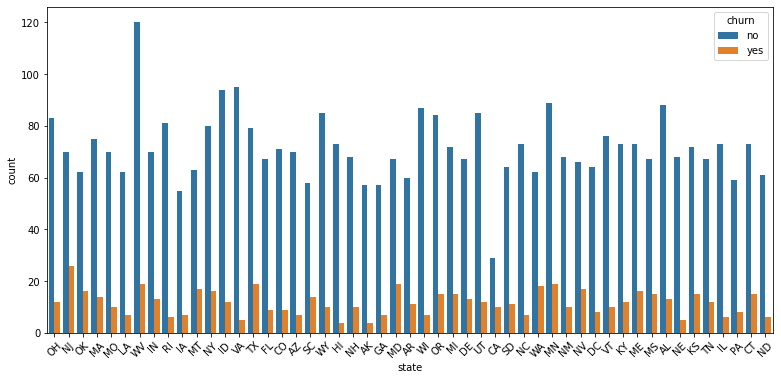

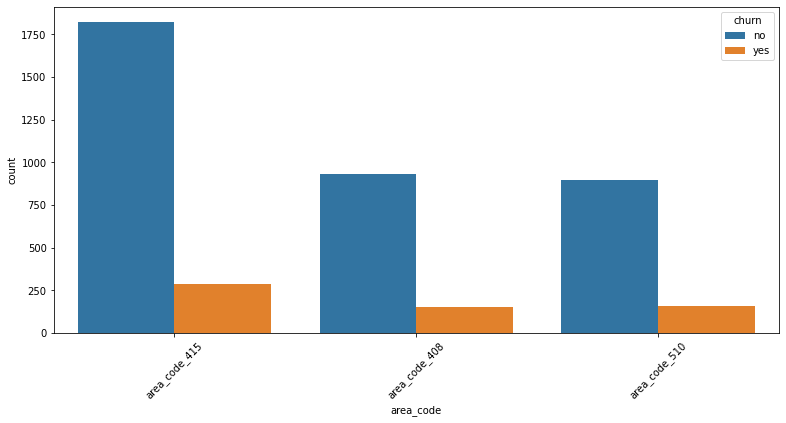

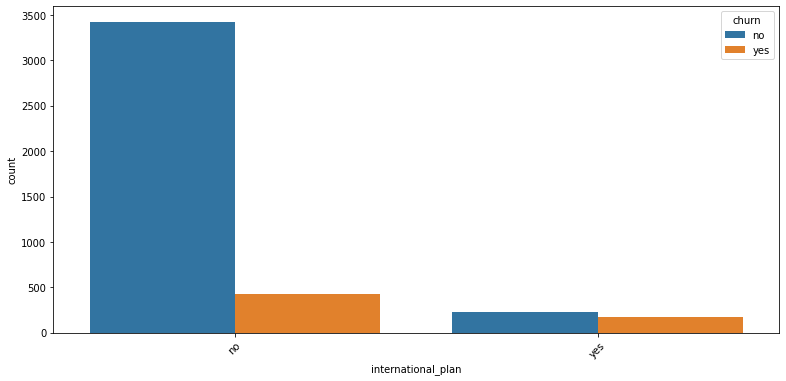

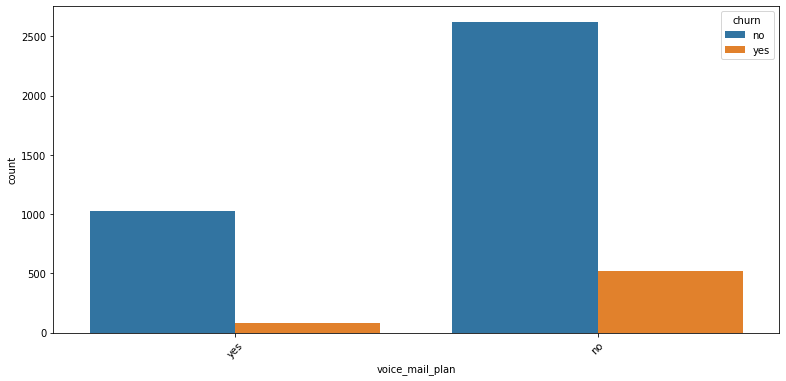

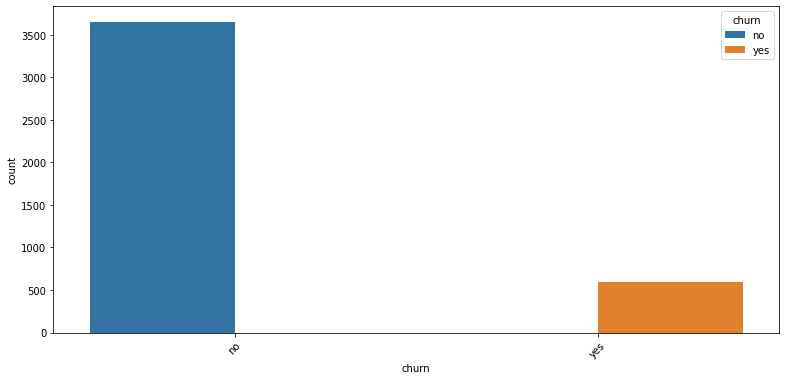

In [ ]:
for i in cat:
  plt.figure(figsize=(13,6))
  sns.countplot(data=df, x=i, hue="churn")
  plt.xticks(rotation = 45)
  plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

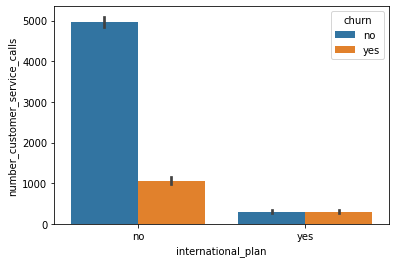

In [ ]:

sns.barplot(y="number_customer_service_calls", x='international_plan', data=df, estimator=sum, hue='churn')

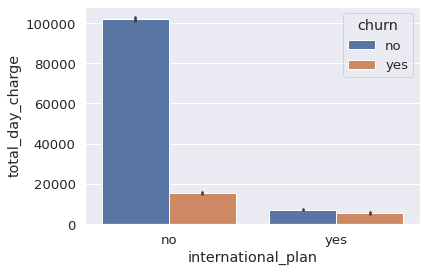

In [ ]:

sns.barplot(y="total_day_charge", x='international_plan', data=df, estimator=sum, hue='churn')

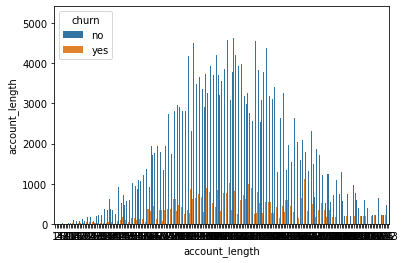

In [ ]:
sns.barplot(y="account_length", x='account_length', data=df, estimator=sum, hue='churn')

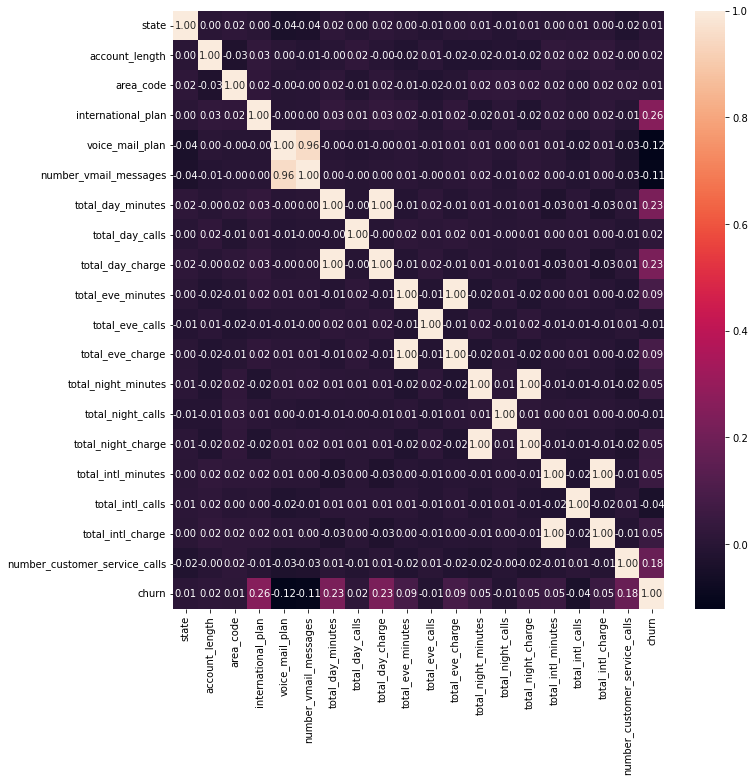

In [ ]:
#membuat heatmap
plt.figure(figsize=(11,11))
sns.heatmap(df1.corr(), annot=True, fmt='.2f')

In [ ]:
! pip install pywedge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pywedge as pw
dash=pw.Pywedge_Charts(df,c=None,y='churn')
dashboard=dash.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

# Imbalance

In [ ]:
df1['Churn_class'] = df1['churn'] > 0.8
df1['Churn_class'].value_counts()

False    3487
True      544
Name: Churn_class, dtype: int64

In [ ]:
x = df1[[col for col in df1.columns if (str(df1[col].dtype) != 'object') and col not in ['churn', 'Churn_class']]]
y = df1['Churn_class'].values
print(x.shape)
print(y.shape)

(4031, 19)
(4031,)


In [ ]:
x

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,35,0.181077,1,0,1,1.398455,-0.356448,1.178699,-0.356730,-0.098620,0.142987,-0.098084,1.088001,0.161974,1.088824,1.287335,-0.607616,1.288072,-0.421668
1,31,0.944434,1,0,0,-0.564454,1.173947,0.718823,1.174110,-1.597838,0.498996,-1.598373,-0.762862,0.212471,-0.761574,0.716557,0.317870,0.710225,-1.247589
2,35,-0.404163,0,1,0,-0.564454,2.221650,-1.478362,2.221815,-2.794387,-0.619891,-2.794806,-0.071309,-0.544975,-0.071595,-1.414348,1.243357,-1.417940,0.404252
3,36,-0.633170,1,1,0,-0.564454,-0.261032,0.667726,-0.260983,-1.051017,1.109298,-1.050008,-0.272928,1.070909,-0.273212,-0.082532,-0.607616,-0.079028,1.230173
4,19,0.537310,2,0,1,1.247462,0.702481,-0.609707,0.701982,2.988597,0.397279,2.987954,0.245233,0.919420,0.246512,-1.071881,1.243357,-1.065595,1.230173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4244,3,-0.073375,2,0,0,-0.564454,1.346070,-0.558610,1.345792,2.823138,-0.467315,2.824157,1.130341,-1.655896,1.129147,-0.577207,0.317870,-0.572312,-0.421668
4245,26,-0.429608,1,0,0,-0.564454,0.143082,-1.529459,0.142912,0.875972,-0.619891,0.875205,0.267411,-1.049939,0.268914,-0.006429,0.780614,-0.008559,-1.247589
4246,49,-0.684061,0,0,0,-0.564454,-0.051491,-0.558610,-0.051883,-1.396059,-0.925042,-1.396594,-0.287041,-0.544975,-0.286653,0.450194,0.780614,0.456537,1.230173
4247,27,-0.633170,0,0,0,-0.564454,-0.186196,0.054558,-0.186147,-0.147047,1.312732,-0.147935,-1.438286,0.212471,-1.438112,-1.300192,1.243357,-1.305190,-0.421668


In [ ]:
from imblearn import under_sampling, over_sampling
x_under, y_under = under_sampling.RandomUnderSampler().fit_resample(x, y)
pd.Series(y_under).value_counts()

False    544
True     544
dtype: int64

In [ ]:
#Split dataset
x=df1.drop(['churn', 'Churn_class'], axis=1)
y=df1['churn']
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.3, random_state=100)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=100)

In [ ]:
#Model Regresi Logistik
logrek = LogisticRegression().fit(xtrain, ytrain) 
print('Model Logistic Regression yang terbentuk adalah: \n',logrek)

Model Logistic Regression yang terbentuk adalah: 
 LogisticRegression()


In [ ]:
# Accuracy - Training Data
logrek.score(xtrain, ytrain)

0.8766394895427153

In [ ]:

#Menampilkan hasil training dengan confusion matrix dari data train
y_train_pred=logrek.predict(xtrain) 
print('classification report training model regresi logistik:') 
print(classification_report(ytrain, y_train_pred))

classification report training model regresi logistik:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2440
           1       0.61      0.24      0.34       381

    accuracy                           0.88      2821
   macro avg       0.75      0.61      0.64      2821
weighted avg       0.85      0.88      0.85      2821



AUC: 0.838


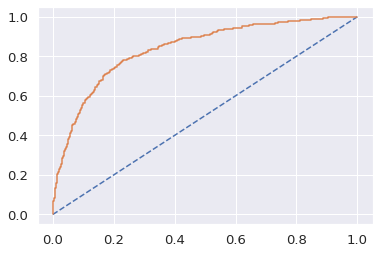

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = logrek.predict_proba(xtrain)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(ytrain, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(ytrain, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

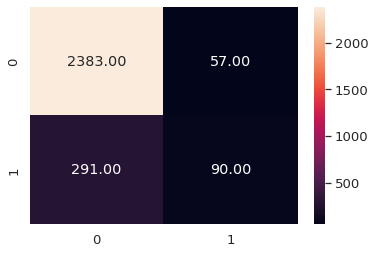

In [ ]:
#confusion matrix training Data
cm_lr = confusion_matrix(ytrain, y_train_pred)
cm_lr
sns.set(font_scale = 1.2)
sns.heatmap(cm_lr,annot = True,fmt = '.2f')

In [ ]:
# Accuracy - Test Data
logrek.score(xtest, ytest)

0.8636363636363636

In [ ]:
#Menampilkan hasil training dengan confusion matrix dari data test
y_test_pred=logrek.predict(xtest)
print('classification report training model regresi logistik:')
print(classification_report(ytrain, y_train_pred))

classification report training model regresi logistik:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2440
           1       0.61      0.24      0.34       381

    accuracy                           0.88      2821
   macro avg       0.75      0.61      0.64      2821
weighted avg       0.85      0.88      0.85      2821



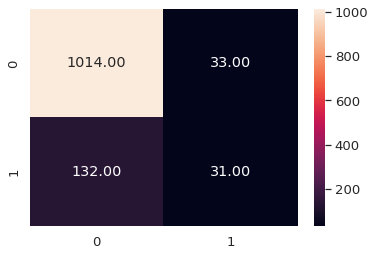

In [ ]:
#confusion matrix test Data
cm_lr = confusion_matrix(ytest, y_test_pred)
cm_lr
sns.set(font_scale = 1.2)
sns.heatmap(cm_lr,annot = True,fmt = '.2f')

In [ ]:
#KNN MODEL 
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(xtrain,ytrain)

KNeighborsClassifier()

0.891527827011698
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2440
           1       0.94      0.21      0.34       381

    accuracy                           0.89      2821
   macro avg       0.92      0.60      0.64      2821
weighted avg       0.90      0.89      0.86      2821

Confusion Matrix


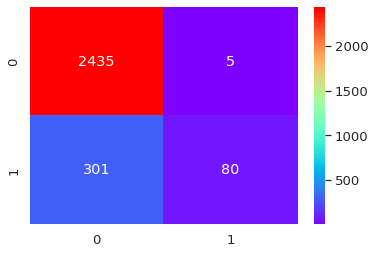

In [ ]:
## Performance Matrix on train data set
y_train_pred = KNN_model.predict(xtrain)
model_score = KNN_model.score(xtrain, ytrain)
print(model_score)
print(classification_report(ytrain, y_train_pred))
#confusion matrix training Data
cm_train_knn = confusion_matrix(ytrain, y_train_pred)
print('Confusion Matrix')
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_knn, annot = True,fmt = 'd', cmap='rainbow')

0.8752066115702479
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2440
           1       0.94      0.21      0.34       381

    accuracy                           0.89      2821
   macro avg       0.92      0.60      0.64      2821
weighted avg       0.90      0.89      0.86      2821

Confusion Matrix


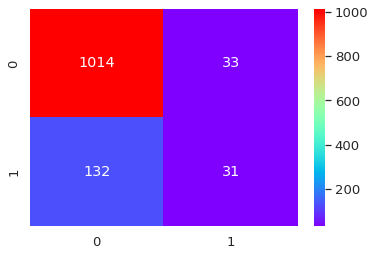

In [ ]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(xtest)
model_score = KNN_model.score(xtest, ytest)
print(model_score)
print(classification_report(ytrain, y_train_pred))
#confusion matrix test Data
cm_test_knn = confusion_matrix(ytest, y_test_pred)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_knn, annot = True,fmt = 'd', cmap='rainbow')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=1000,random_state=12)
RF_model.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=1000, random_state=12)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2440
           1       1.00      1.00      1.00       381

    accuracy                           1.00      2821
   macro avg       1.00      1.00      1.00      2821
weighted avg       1.00      1.00      1.00      2821

Confusion Matrix


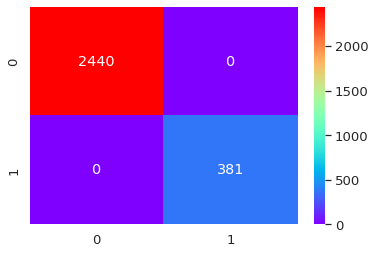

In [ ]:
## Performance Matrix on train data set
y_train_pred = RF_model.predict(xtrain)
model_score =RF_model.score(xtrain, ytrain)
print(model_score)
print(classification_report(ytrain, y_train_pred))
#confusion matrix training Data
cm_train_rf = confusion_matrix(ytrain, y_train_pred)
print('Confusion Matrix')
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_rf, annot = True,fmt = 'd', cmap='rainbow')


0.9570247933884297
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1047
           1       0.95      0.72      0.82       163

    accuracy                           0.96      1210
   macro avg       0.95      0.86      0.90      1210
weighted avg       0.96      0.96      0.95      1210

Confusion Matrix


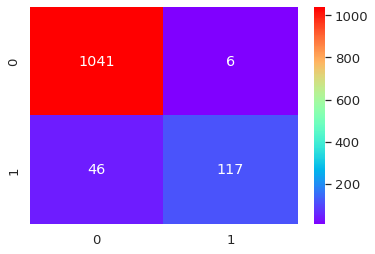

In [ ]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(xtest)
model_score = RF_model.score(xtest, ytest)
print(model_score)
print(classification_report(ytest, y_test_predict))
#confusion matrix test Data
cm_test_rf = confusion_matrix(ytest, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_rf, annot = True,fmt = 'd', cmap='rainbow')

In [ ]:
#DT
from sklearn import tree
DT_model= tree.DecisionTreeClassifier()
DT_model.fit(xtrain, ytrain)

DecisionTreeClassifier()

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2440
           1       1.00      1.00      1.00       381

    accuracy                           1.00      2821
   macro avg       1.00      1.00      1.00      2821
weighted avg       1.00      1.00      1.00      2821



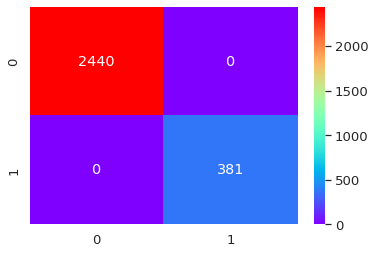

In [ ]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(xtrain)
model_score = DT_model.score(xtrain, ytrain)
print(model_score)
print(classification_report(ytrain, y_train_predict))
#confusion matrix training Data
cm_train_dt = confusion_matrix(ytrain, y_train_predict)
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_dt, annot = True,fmt = 'd', cmap='rainbow')

0.9264462809917355
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1047
           1       0.74      0.70      0.72       163

    accuracy                           0.93      1210
   macro avg       0.85      0.83      0.84      1210
weighted avg       0.92      0.93      0.93      1210

Confusion Matrix


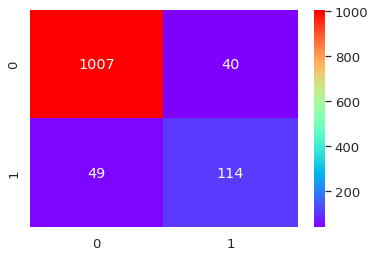

In [ ]:

## Performance Matrix on test data set
y_test_predict = DT_model.predict(xtest)
model_score = DT_model.score(xtest, ytest)
print(model_score)
print(classification_report(ytest, y_test_predict))
#confusion matrix test Data
cm_test_dt = confusion_matrix(ytest, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_dt, annot = True,fmt = 'd', cmap='rainbow')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
#Latih model dengan GradientBoostingClassifier()
gbt_model = GradientBoostingClassifier().fit(xtrain, ytrain)
print(gbt_model)

GradientBoostingClassifier()


In [ ]:
#Menampilkan hasil training dengan confusion matrix
from sklearn.metrics import classification_report
# Predict
y_train_pred = gbt_model.predict(xtrain)
# Print classification report 
print('Classification Report Training Model (Gradien Boosting) :')
print(classification_report(ytrain, y_train_pred))

Classification Report Training Model (Gradien Boosting) :
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2440
           1       0.99      0.82      0.90       381

    accuracy                           0.97      2821
   macro avg       0.98      0.91      0.94      2821
weighted avg       0.97      0.97      0.97      2821



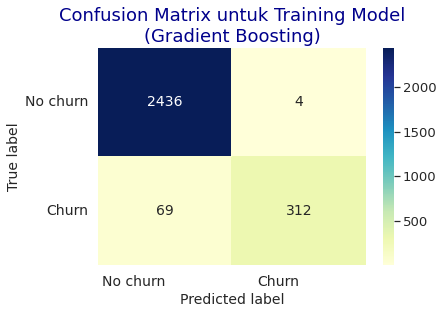

In [ ]:
#Menampilkan hasil training model dengan visualisasi heatmap dari confusion matrix 
confusion_matrix_df = pd.DataFrame((confusion_matrix(ytrain, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1047
           1       0.48      0.19      0.27       163

    accuracy                           0.86      1210
   macro avg       0.68      0.58      0.60      1210
weighted avg       0.83      0.86      0.84      1210



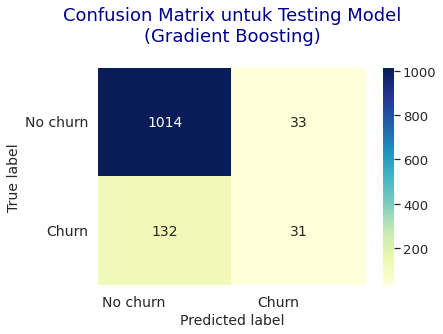

In [ ]:
#Menampilkan hasil testing model dengan confusion matrix # Predict y_test_pred = gbt_model.predict(x_test) 
# Print classification report 
print('Classification Report Testing Model (Gradient Boosting):') 
print(classification_report(ytest, y_test_pred))

#Menampilkan hasil testing model dengan visualisasi heatmap dari confusion matrix 
confusion_matrix_df = pd.DataFrame((confusion_matrix(ytest, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Testing Model\n(Gradient Boosting)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()
